In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [233]:
def write_reg(ra,dec,size='2"',color='green',shape='circle',filename='regions.reg'):
    f = open(filename,'w')
    f.write('fk5\n')
    for i,j in zip(ra,dec):
        f.write(shape+' '+str(i)+' '+str(j)+' '+size+' # color='+color+'\n')
    f.close()
        

In [345]:
def make_diff_arr(data,n_apers,cor_aper=None):
    if cor_aper is None:
        cor_aper = n_apers - 1
        
    mags = data[:,2:n_apers+2]
    diff_arr = np.zeros((data.shape[0],n_apers))
    for i in range(n_apers):
        diff_arr[:,i] = mags[:,cor_aper] - mags[:,i]
        
    return diff_arr

def calc_aper_cor(data,fwhm_max=4.5,fwhm_min=4.,n_apers=18,meas_aper=3,\
                  cor_aper=13,sat_cut=17.,faint_cut=20.,cir_cut=1.):
    n_apers = 18
    ra = data[:,0]
    dec = data[:,1]
    mags = data[:,2:n_apers+2]
    merrs = data[:,n_apers+2:(2.*n_apers)+2]
    flags = data[:,-1]
    fwhm = data[:,-3]
    ellip = data[:,-2]
    
    good = (flags < flag_cut) & (ellip < cir_cut) & (mags[:,meas_aper] > sat_cut) \
        & (mags[:,meas_aper] < faint_cut) & \
         (fwhm < ext_cut)  & (fwhm > min_ext_cut)
            
    aper_cor = np.median(mags[good,meas_aper] - mags[good,cor_aper])
    
    return (aper_cor,diff_arr,good)

def make_merr_plot(merrs,apers,figsize=(10,5),save=False,fname='merr_plot.png',dpi=300,**args):
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(apers,np.median(merrs,axis=0),**args)
    
    if save:
        fig.savefig(fname,dpi=dpi)
        
def make_cog_plot(diff_arr,apers,figsize=(10,5),save=False,fname='merr_plot.png',dpi=300,**args):
    fig,ax = plt.subplots(figsize=figsize)
    medians = np.median(diff_arr,axis=0)
    
    ax.plot(apers,medians)
    
    if save:
        fig.savefig(fname,dpi=dpi)

In [347]:
diff_arr = make_diff_arr(data,n_apers=18,cor_aper=17)

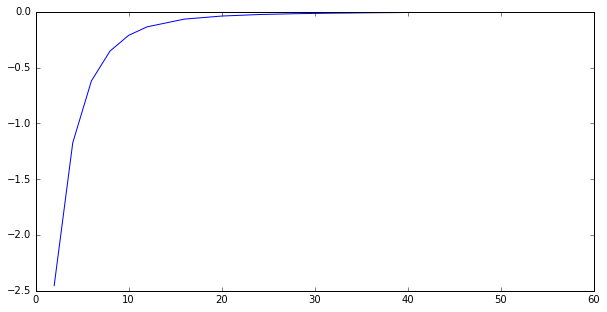

In [352]:
make_cog_plot(diff_arr[good,:],apers)

In [ ]:
apers = np.array([2,4,6,8,10,12,16,20,24,28,32,36,40,44,48,52,56,60])


In [336]:
aper_cor,good = calc_aper_cor(data,meas_aper=4,cor_aper=13)

/Users/zjennings/anaconda/envs/astro/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [337]:
aper_cor

0.20554999999999879

In [329]:
data[:,18+2:(2.*18)+2][:,-1]

/Users/zjennings/anaconda/envs/astro/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([  5.2401,  99.    ,  99.    , ...,  99.    ,  99.    ,  99.    ])

In [234]:
write_reg(data[good,0],data[good,1],filename='aper_corrections.reg',color='red')

In [8]:
data = np.loadtxt('g_catalog_apers.cat')


In [257]:
n_apers = 18
ra = data[:,0]
dec = data[:,1]
mags = data[:,2:n_apers+2]
merrs = data[:,n_apers+2:(2.*n_apers)+2]
flags = data[:,-1]
fwhm = data[:,-3]

/Users/zjennings/anaconda/envs/astro/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [238]:
fwhm

array([  5.09,   1.06,   7.85, ...,   1.31,  12.06,   2.21])

In [9]:
data[0,:]

array([  2.02006899e+02,   2.04980404e+01,   2.77775000e+01,
         2.64087000e+01,   2.58138000e+01,   2.55341000e+01,
         2.53992000e+01,   2.52357000e+01,   2.51740000e+01,
         2.51261000e+01,   2.57260000e+01,   2.63040000e+01,
         2.64269000e+01,   2.64795000e+01,   9.90000000e+01,
         9.90000000e+01,   9.90000000e+01,   9.90000000e+01,
         9.90000000e+01,   2.78922000e+01,   1.61500000e-01,
         9.14000000e-02,   7.88000000e-02,   8.08000000e-02,
         8.89000000e-02,   9.15000000e-02,   1.14900000e-01,
         1.37200000e-01,   2.85500000e-01,   5.66700000e-01,
         7.25100000e-01,   8.56100000e-01,   9.90000000e+01,
         9.90000000e+01,   9.90000000e+01,   9.90000000e+01,
         9.90000000e+01,   5.24010000e+00,   5.09000000e+00,
         6.06000000e-01,   0.00000000e+00])

In [154]:
err_arr = data[good,20:38]

In [155]:
np.median(err_arr,axis=0)

array([ 0.0049 ,  0.0028 ,  0.0022 ,  0.0021 ,  0.0021 ,  0.0021 ,
        0.0024 ,  0.0027 ,  0.003  ,  0.0034 ,  0.0038 ,  0.0042 ,
        0.0046 ,  0.005  ,  0.0054 ,  0.0058 ,  0.00625,  0.00665])

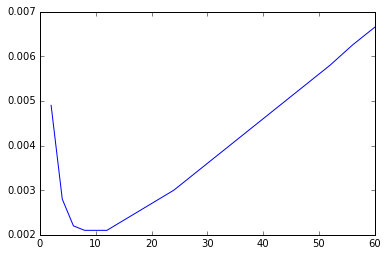

In [156]:
apers = np.array([2,4,6,8,10,12,16,20,24,28,32,36,40,44,48,52,56,60])
plt.plot(apers,np.median(err_arr,axis=0))

array([ 2,  4,  6,  8, 10, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56,
       60])

In [254]:
diff_arr = np.zeros((data.shape[0],18))
for i in range(18):
    diff_arr[:,i] = data[:,18] - data[:,i+2] 

In [255]:
medians = np.median(diff_arr,axis=0)

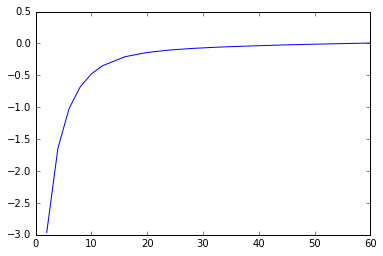

In [256]:
plt.plot(apers,medians)

In [338]:
sat_cut = 16
faint_cut = 20.5
flag_cut = 1
ext_cut = 4.5
min_ext_cut = 4.2

In [339]:
good = (data[:,-1] < flag_cut) & (data[:,-2] < cir_cut) & (data[:,6] > sat_cut) & (data[:,6] < faint_cut) & \
 (data[:,-3] < ext_cut)  & (data[:,-3] > min_ext_cut)

In [340]:
np.median(diff_arr[:,5])

-0.34850000000000136

In [341]:
np.median(diff_arr[good,5])

-0.13365000000000116

In [303]:
np.sum(good)

342

(-2, 2)

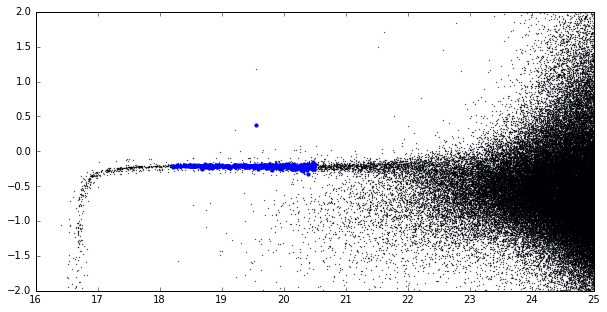

In [304]:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(data[:,6],diff_arr[:,4],s=0.1)
ax.set_xlim(16,25)
ax.set_ylim(-2,2)
ax.scatter(data[good,6],diff_arr[good,4],s=10,color='b')
ax.set_xlim(16,25)
ax.set_ylim(-2,2)

In [130]:
data[2,]

array([  2.02028977e+02,   2.04981180e+01,   2.66455000e+01,
         2.54019000e+01,   2.49044000e+01,   2.46872000e+01,
         2.45788000e+01,   2.45049000e+01,   2.45241000e+01,
         2.46945000e+01,   2.48022000e+01,   2.50643000e+01,
         2.51568000e+01,   2.58388000e+01,   2.63243000e+01,
         2.88817000e+01,   9.90000000e+01,   9.90000000e+01,
         9.90000000e+01,   9.90000000e+01,   6.09000000e-02,
         3.77000000e-02,   3.51000000e-02,   3.77000000e-02,
         4.23000000e-02,   4.71000000e-02,   6.35000000e-02,
         9.24000000e-02,   1.22200000e-01,   1.81200000e-01,
         2.25300000e-01,   4.74700000e-01,   8.24700000e-01,
         9.55980000e+00,   9.90000000e+01,   9.90000000e+01,
         9.90000000e+01,   9.90000000e+01,   7.85000000e+00,
         5.53000000e-01,   0.00000000e+00])

In [93]:
data[good,:]

array([[  2.02634420e+02,   2.12508018e+01,   1.90880000e+01,
          1.81546000e+01,   1.78897000e+01,   1.77995000e+01,
          1.77615000e+01,   1.77421000e+01,   1.77311000e+01,
          1.77244000e+01,   1.77201000e+01,   1.77167000e+01,
          5.10000000e+00,   5.20000000e-02,   0.00000000e+00],
       [  2.01727980e+02,   2.15239070e+01,   1.91179000e+01,
          1.81789000e+01,   1.79000000e+01,   1.78064000e+01,
          1.77671000e+01,   1.77470000e+01,   1.77357000e+01,
          1.77287000e+01,   1.77244000e+01,   1.77207000e+01,
          5.22000000e+00,   8.40000000e-02,   0.00000000e+00],
       [  2.02252162e+02,   2.15361259e+01,   1.89213000e+01,
          1.79895000e+01,   1.77365000e+01,   1.76473000e+01,
          1.76087000e+01,   1.75887000e+01,   1.75768000e+01,
          1.75697000e+01,   1.75649000e+01,   1.75614000e+01,
          5.17000000e+00,   8.50000000e-02,   0.00000000e+00],
       [  2.02557906e+02,   2.15394765e+01,   1.91345000e+01,
     